In [1]:
import numpy as np
import pandas as pd
import plotly

from plotly.subplots import make_subplots

plotly.__version__

'5.4.0'

***See Returns.ipynb for an example of using plotly with pandas Series and DataFrames***

***Reading https://plot.ly/python/creating-and-updating-figures/ is worthwhile***

## Simple example

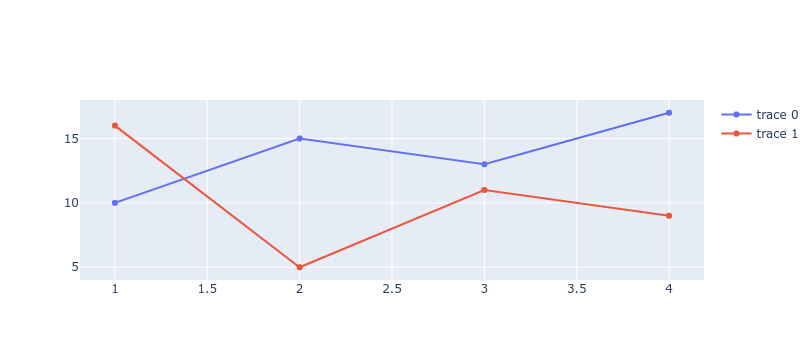

In [2]:
import plotly
import plotly.graph_objs as go


trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = [trace0, trace1]

go.Figure(data).show()


## Wrapping matplotlib

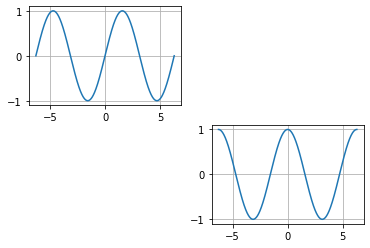

In [3]:
# Matplotlib
import matplotlib.pyplot as plt


## Generating the data..
x =  np.linspace(-2*np.pi, 2*np.pi, 1000)


fig = plt.figure()                     # Initiate a figure

a1 = fig.add_subplot(221)              # Figure has 1 row 1 column ; choose the first subplot
a1.plot(x,np.sin(x))                   # Plot x and y in the chosen subplot
a1.grid()

a2 = fig.add_subplot(224)
a2.plot(x,np.cos(x))
a2.grid()

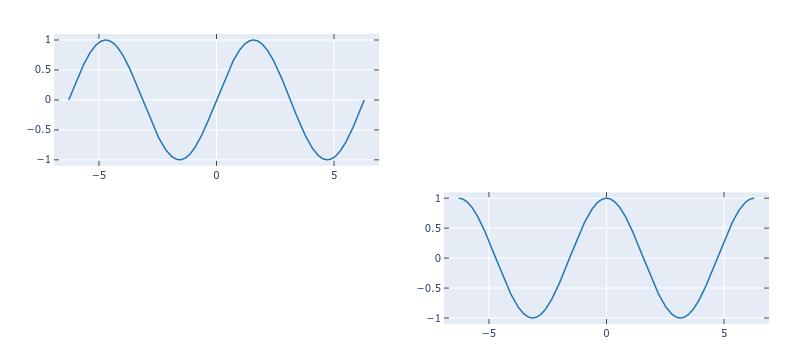

In [4]:
# Now we make the matplotlib figure interactive using plotly

import plotly.tools as tls
plotly_fig = tls.mpl_to_plotly(fig)

plotly_fig.show()

## Plotting columns of a DataFrame

In [6]:
def PlotData(df):
    pdata = [{'x':df.index,'y':df[col],'name':col} for col in df.columns]
    return(pdata)

In [8]:
ETFRets = pd.read_pickle('/home/vpoduri/Site/ETFRets.pkl')
ETFRets.head()

GLD  AGG  EEM       IWM  VNQ       IWV  EFA  IVV
Date                                                        
2000-05-01  NaN  NaN  NaN       NaN  NaN       NaN  NaN  NaN
2000-06-01  NaN  NaN  NaN  0.086171  NaN  0.008943  NaN  NaN
2000-07-01  NaN  NaN  NaN -0.027670  NaN -0.007471  NaN  NaN
2000-08-01  NaN  NaN  NaN  0.069652  NaN  0.073871  NaN  NaN
2000-09-01  NaN  NaN  NaN -0.036093  NaN -0.041583  NaN  NaN

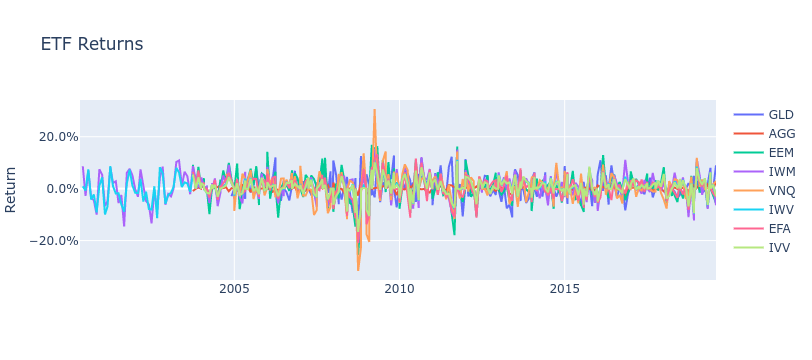

In [9]:
# Plotting
pdata = PlotData(ETFRets)
layout = go.Layout(title = 'ETF Returns',yaxis=dict(tickformat='.1%',title='Return'))

pFig = go.Figure(pdata,layout)   # creates a Figure object
pFig.show()

## Elaborate subplots

In [8]:
# Rolling Correlations
RCorr = ETFRets.rolling(12).corr(pairwise=True) # Really nice syntax!

nr = 2 ; nc = 4
fig = make_subplots(rows=nr, cols=nc, start_cell="top-left",
                   subplot_titles=list(RCorr.columns))


In [9]:
foo = RCorr.reset_index().rename(columns={"level_1":"ETF"})
foo.head(10)

Date  ETF  GLD  AGG  EEM  IWM  VNQ  IWV  EFA  IVV
0 2000-05-01  GLD  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1 2000-05-01  AGG  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2 2000-05-01  EEM  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3 2000-05-01  IWM  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4 2000-05-01  VNQ  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5 2000-05-01  IWV  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6 2000-05-01  EFA  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7 2000-05-01  IVV  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8 2000-06-01  GLD  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
9 2000-06-01  AGG  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

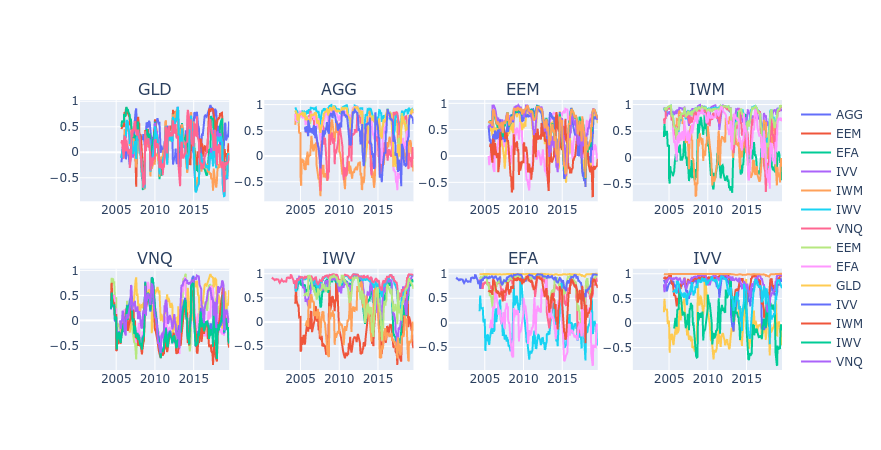

In [10]:
# Visualization with subplots. Quite finicky.
ETFList = foo.columns[2:]

for j in range(len(ETFList)):
    ticker = ETFList[j]
    df1 = foo.loc[foo["ETF"]==ticker,:]
    df1 = df1.drop(columns=["ETF",ticker])  # All values are 1
    
    fr,fc = np.unravel_index(j,(nr,nc),order='F')  # Calculates subplot index, Fortran style (column major order)
    
    plines = [go.Scatter(x=df1["Date"],y=df1[col],name=col) for col in ETFList.difference([ticker])]
    _=[fig.append_trace(pl,row=int(fr+1),col=int(fc+1)) for pl in plines]
    
                            # only append_trace seems to do the trick with subplots
                            # np.int64 for row and col cause errors, so have to use int
        
fig.show()

## plotly express

Plotly express was inspired by ggplot and Seaborn. It is a wrapper around lower-level classes and methods. It works best if the data are in a long form DataFrame. 

See its [tutorial](https://plot.ly/python/plotly-express/) for details.

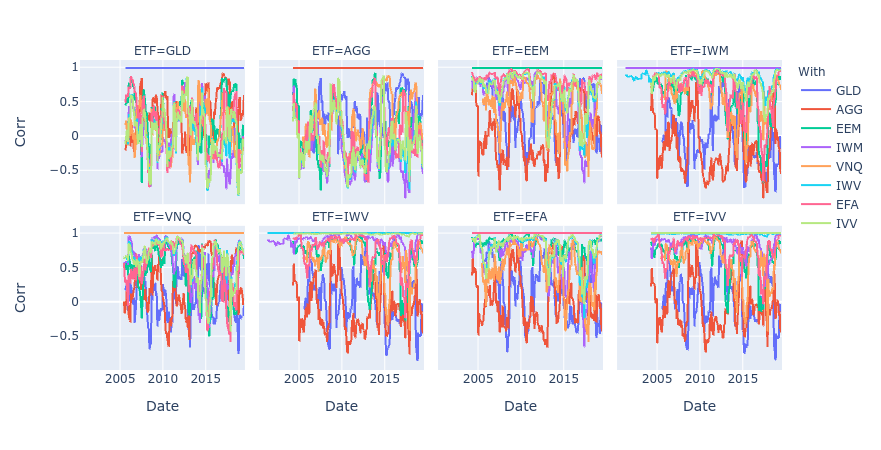

In [11]:
import plotly.express as px

RC2 = RCorr.reset_index().rename(columns={'level_1':'ETF'})
RC2 = pd.melt(RC2,id_vars=['Date','ETF'],var_name='With',value_name='Corr')

px.line(RC2,x='Date',y='Corr',color='With',facet_col='ETF',facet_col_wrap=4)   # Remarkably elegant


In [48]:
RC2.head()

Date  ETF With  Corr
0 2000-05-01  GLD  GLD   NaN
1 2000-05-01  AGG  GLD   NaN
2 2000-05-01  EEM  GLD   NaN
3 2000-05-01  IWM  GLD   NaN
4 2000-05-01  VNQ  GLD   NaN